In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [33]:
for dirname, _, filenames in os.walk('D:/Workspace/pythonProject1/numberplate/data/car-plate-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars0.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars1.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars10.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars100.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars101.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars102.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars103.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars104.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars105.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars106.xml
D:/Workspace/pythonProject1/numberplate/data/car-plate-detection\annotations\Cars107.xml
D:/Workspace/pythonProject

In [5]:
IMAGE_SIZE=200

In [32]:
img_dir="D:/Workspace/pythonProject1/numberplate/data/car-plate-detection/images/"

data_path=os.path.join(img_dir)
files=os.listdir(data_path)
print(files)
print(data_path)
X=[]
for i in files:
    img_path=img_dir+i
    img=cv2.imread(img_path)
    # img=cv2.imread(f1)
    img=cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

['Cars0.png', 'Cars1.png', 'Cars10.png', 'Cars100.png', 'Cars101.png', 'Cars102.png', 'Cars103.png', 'Cars104.png', 'Cars105.png', 'Cars106.png', 'Cars107.png', 'Cars108.png', 'Cars109.png', 'Cars11.png', 'Cars110.png', 'Cars111.png', 'Cars112.png', 'Cars113.png', 'Cars114.png', 'Cars115.png', 'Cars116.png', 'Cars117.png', 'Cars118.png', 'Cars119.png', 'Cars12.png', 'Cars120.png', 'Cars121.png', 'Cars122.png', 'Cars123.png', 'Cars124.png', 'Cars125.png', 'Cars126.png', 'Cars127.png', 'Cars128.png', 'Cars129.png', 'Cars13.png', 'Cars130.png', 'Cars131.png', 'Cars132.png', 'Cars133.png', 'Cars134.png', 'Cars135.png', 'Cars136.png', 'Cars137.png', 'Cars138.png', 'Cars139.png', 'Cars14.png', 'Cars140.png', 'Cars141.png', 'Cars142.png', 'Cars143.png', 'Cars144.png', 'Cars145.png', 'Cars146.png', 'Cars147.png', 'Cars148.png', 'Cars149.png', 'Cars15.png', 'Cars150.png', 'Cars151.png', 'Cars152.png', 'Cars153.png', 'Cars154.png', 'Cars155.png', 'Cars156.png', 'Cars157.png', 'Cars158.png', 'Car

In [34]:
print(X)

[array([[[142, 115,  60],
        [162, 127,  47],
        [173, 147,  90],
        ...,
        [ 38,  39,  38],
        [ 44,  43,  42],
        [ 37,  36,  34]],

       [[132, 110,  58],
        [155, 121,  41],
        [141, 117,  65],
        ...,
        [ 49,  50,  50],
        [ 46,  47,  44],
        [ 36,  38,  35]],

       [[132, 114,  69],
        [154, 123,  45],
        [144, 126,  80],
        ...,
        [ 39,  39,  40],
        [ 50,  49,  46],
        [ 36,  37,  33]],

       ...,

       [[ 39,  47,  70],
        [ 40,  48,  71],
        [ 41,  49,  72],
        ...,
        [ 42,  61,  98],
        [ 46,  66, 100],
        [ 47,  68, 101]],

       [[ 43,  51,  74],
        [ 42,  50,  73],
        [ 40,  48,  71],
        ...,
        [ 44,  63, 100],
        [ 46,  65, 102],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  49,  72],
        [ 37,  45,  68],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]

In [35]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [37]:
path = 'D:/Workspace/pythonProject1/numberplate/data/car-plate-detection/annotations'
text_files = ['D:/Workspace/pythonProject1/numberplate/data/car-plate-detection/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [39]:
print(y[0])

[167, 129, 90, 93]


In [44]:
X=np.array(X)
print(X.shape)

(433, 200, 200, 3)


In [45]:
y=np.array(y)
print(y.shape)

(433, 4)


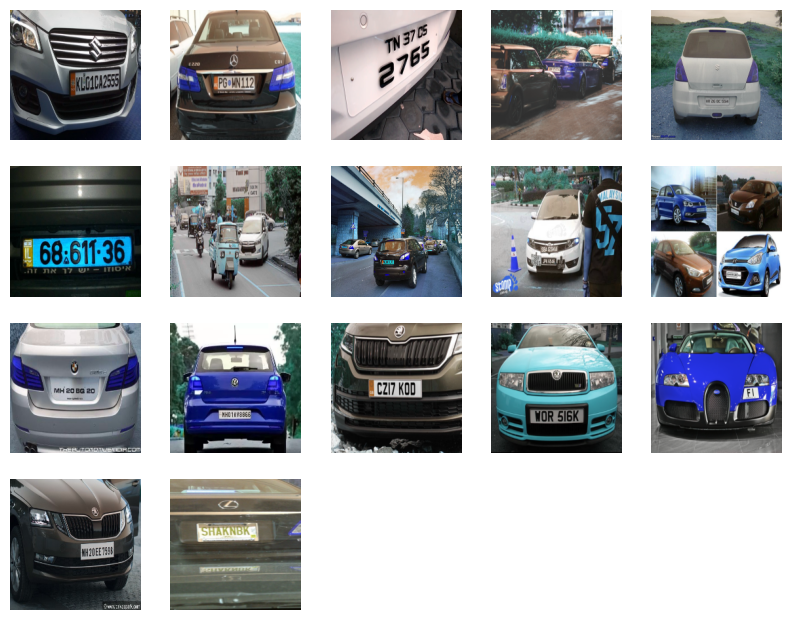

In [46]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

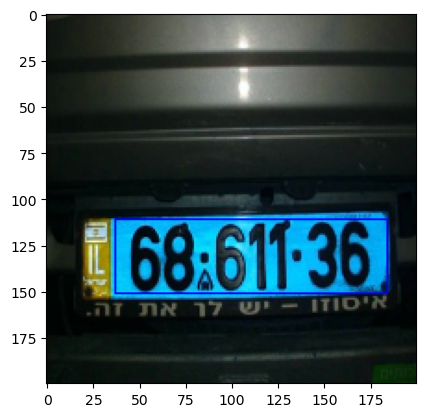

In [47]:
#Example with the first image of the dataset
image = cv2.rectangle(X[5],(y[5][0],y[5][1]),(y[5][2],y[5][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [48]:
#Renormalisation
X = X / 255
y = y / 255

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [52]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [53]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()




58889256/58889256 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                       

In [54]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [55]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50


13/13 [==============================] - 22s 2s/step - loss: 0.0420 - accuracy: 0.4756 - val_loss: 0.0107 - val_accuracy: 0.7500
Epoch 2/50
13/13 [==============================] - 20s 2s/step - loss: 0.0111 - accuracy: 0.7506 - val_loss: 0.0073 - val_accuracy: 0.7500
Epoch 3/50
13/13 [==============================] - 20s 2s/step - loss: 0.0055 - accuracy: 0.7429 - val_loss: 0.0099 - val_accuracy: 0.7045
Epoch 4/50
13/13 [==============================] - 20s 2s/step - loss: 0.0044 - accuracy: 0.7404 - val_loss: 0.0051 - val_accuracy: 0.8182
Epoch 5/50
13/13 [==============================] - 21s 2s/step - loss: 0.0028 - accuracy: 0.7995 - val_loss: 0.0047 - val_accuracy: 0.7955
Epoch 6/50
13/13 [==============================] - 21s 2s/step - loss: 0.0018 - accuracy: 0.8432 - val_loss: 0.0046 - val_accuracy: 0.8636
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.0011 - accuracy: 0.8946 - val_loss: 0.0041 - val_accuracy: 0.8636
Epoch 8/50
13/13 [

In [56]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 86.36%


In [57]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

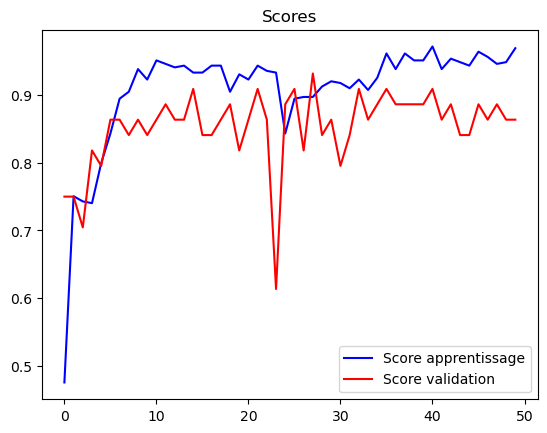

In [58]:
plot_scores(train)

Detection


In [59]:
y_cnn = model.predict(X_test)

2/2 [==============================] - 2s 607ms/step


In [60]:
y_cnn.shape

(44, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

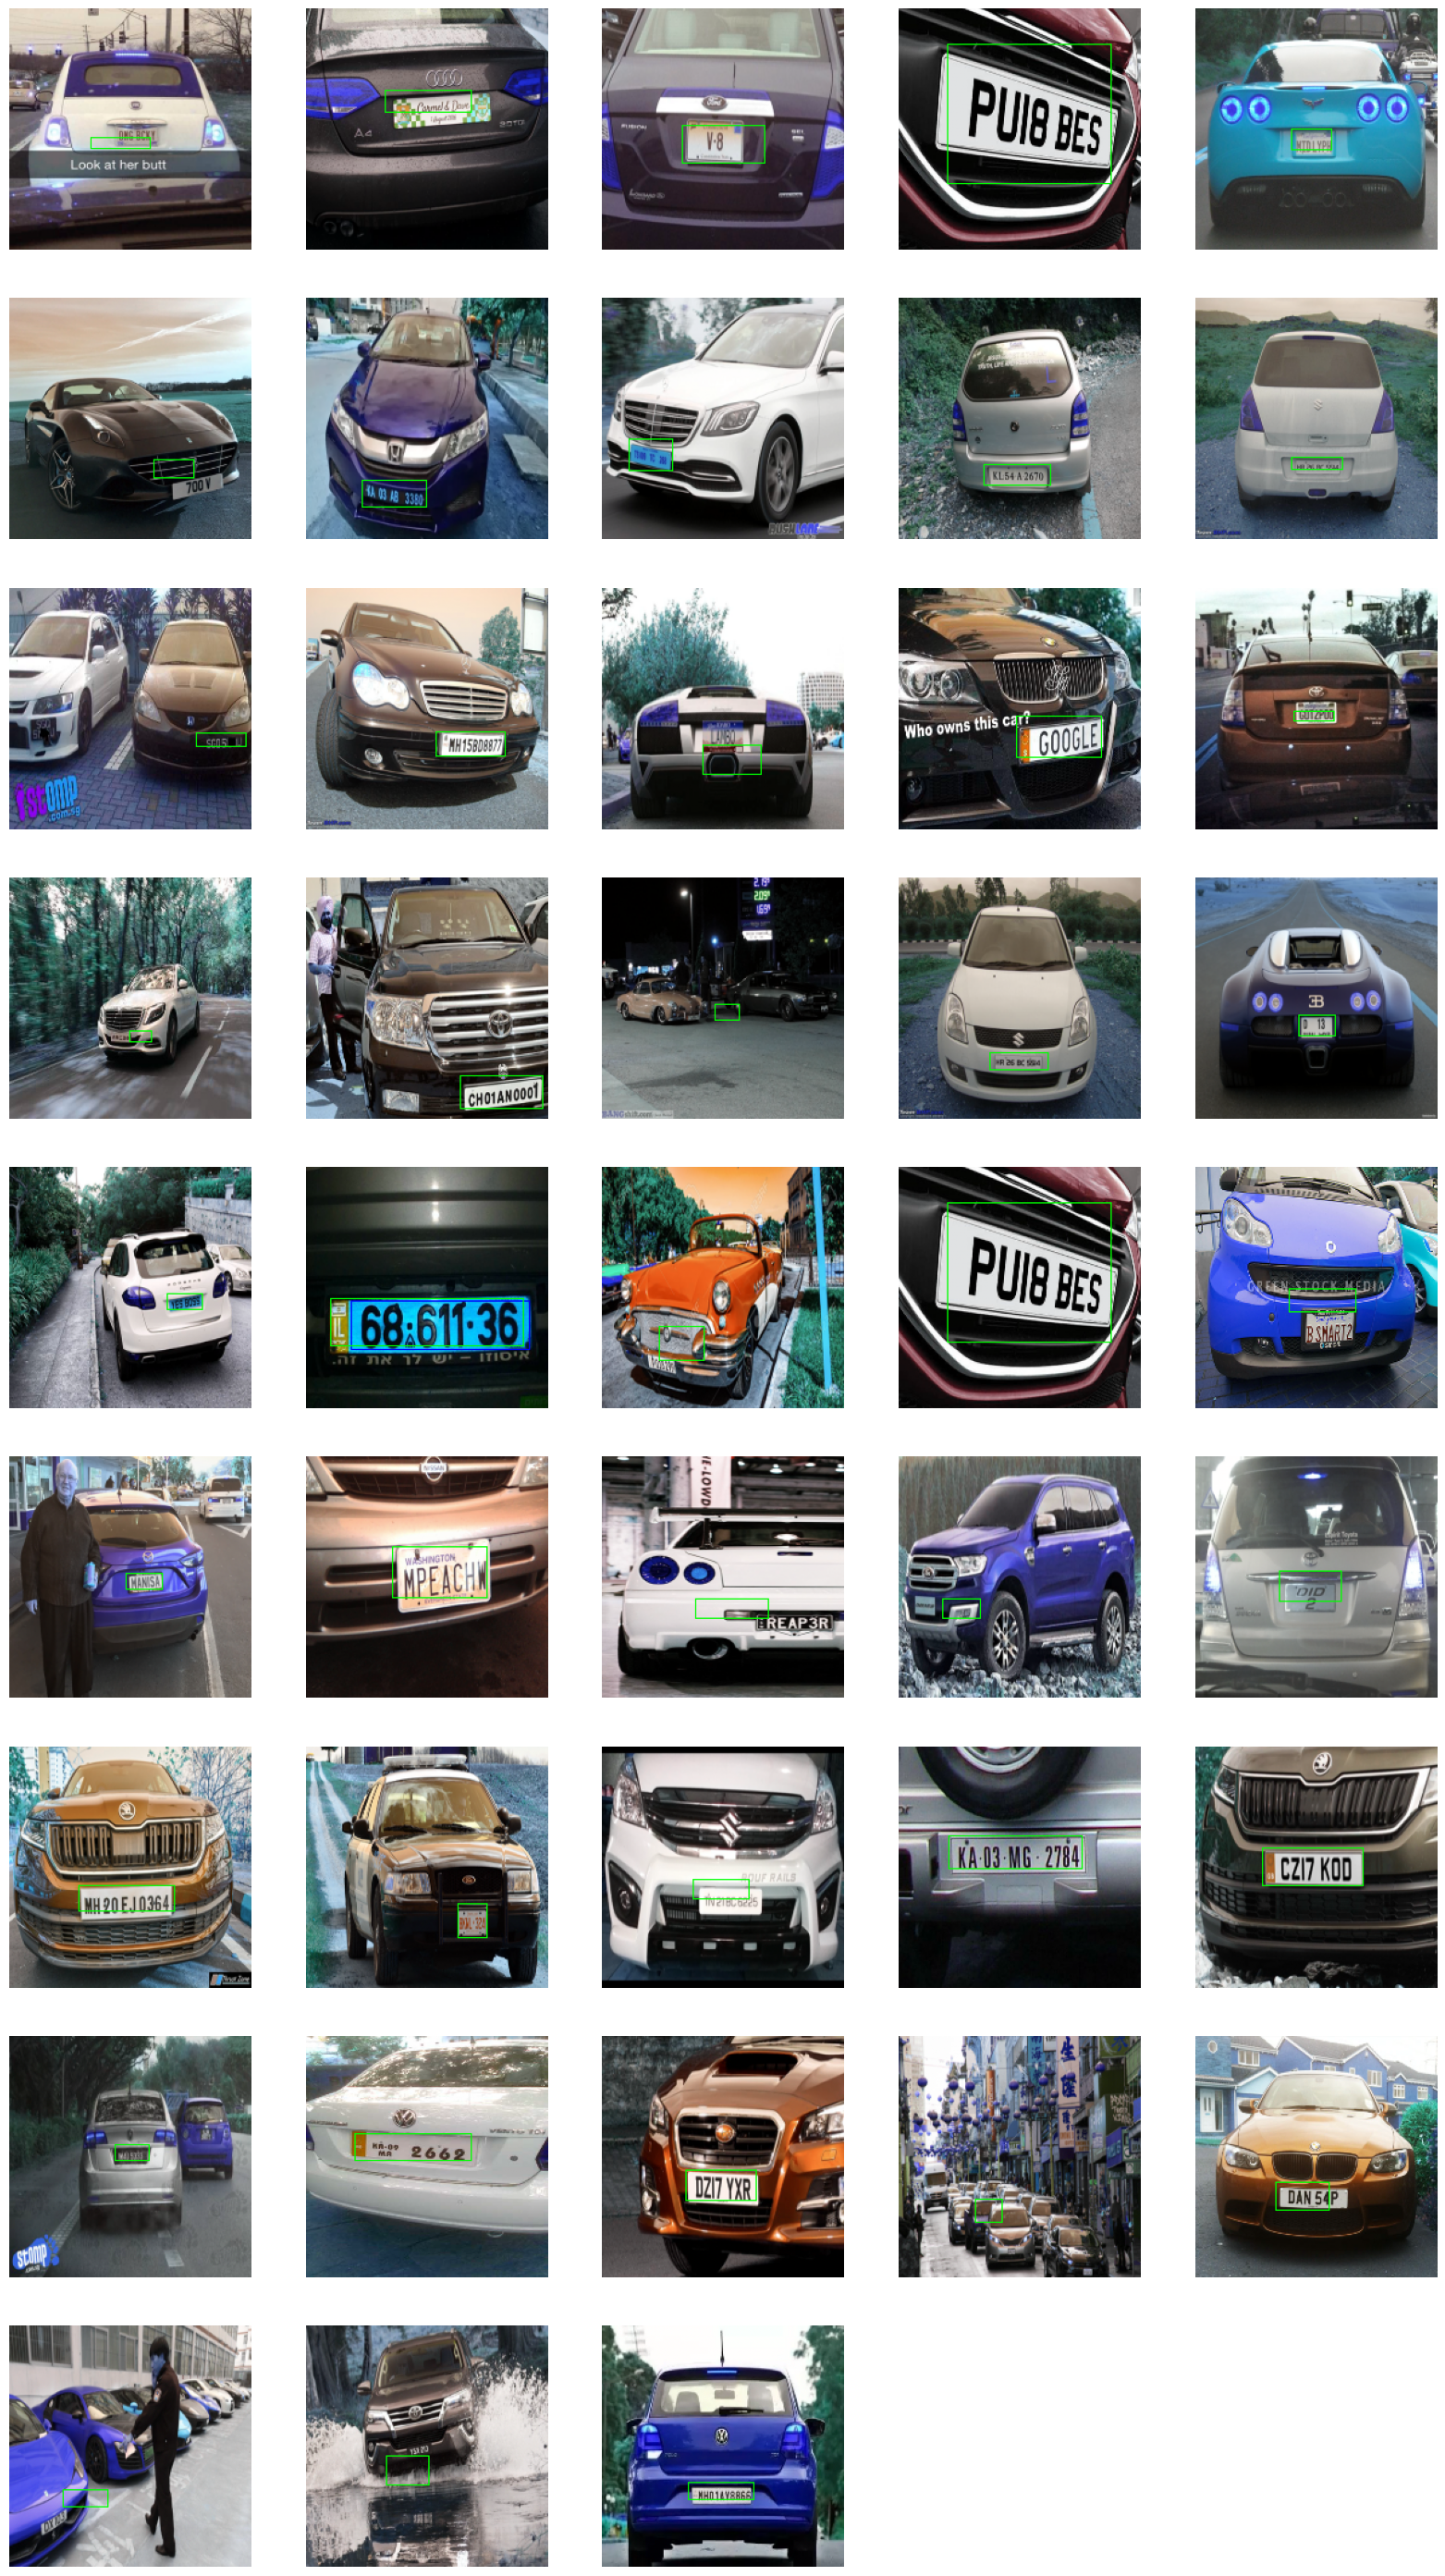

In [61]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)